### Import libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
%matplotlib inline

### 1. Read the dataset and understand the features and target variable.

In [2]:
df_bankruptcy=pd.read_csv('Qualitative_Bankruptcy.csv',header=None,names=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class'])

In [3]:
df_bankruptcy.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [4]:
df_bankruptcy.shape

(250, 7)

Attributes are
     1. Industrial Risk: {P,A,N}
     2. Management Risk: {P,A,N}
     3. Financial Flexibility: {P,A,N}
     4. Credibility: {P,A,N}
     5. Competitiveness: {P,A,N}
     6. Operating Risk: {P,A,N}
     7. Class: {B,NB}

P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)

The target varaible is class to decide the bankruptcy based on the above 6 attributes 

In [5]:
df_bankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


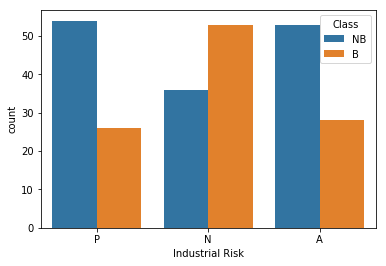

In [208]:
sns.countplot(x='Industrial Risk',hue='Class',data=df_bankruptcy)

Observation:
    For most of the case for bankruptcy the inductrial risk is 'N'

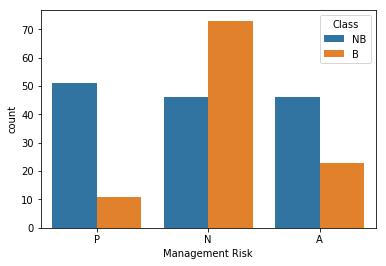

In [209]:
sns.countplot(x='Management Risk',hue='Class',data=df_bankruptcy)

Observation:
    For most of the case for bankruptcy the Management risk is 'N'

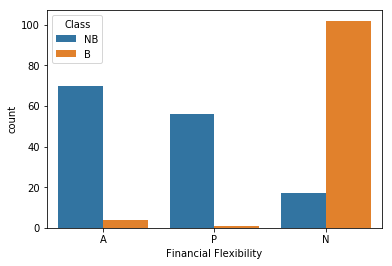

In [210]:
sns.countplot(x='Financial Flexibility',hue='Class',data=df_bankruptcy)

Observation:
    For most of the case for bankruptcy the Financial Flexibility is 'N'

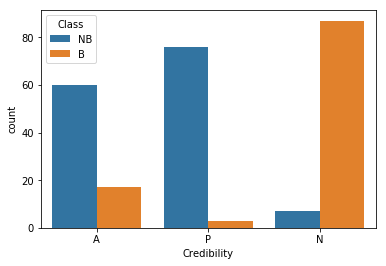

In [211]:
sns.countplot(x='Credibility',hue='Class',data=df_bankruptcy)

Observation:
    For most of the case for bankruptcy the Credibility is 'N'

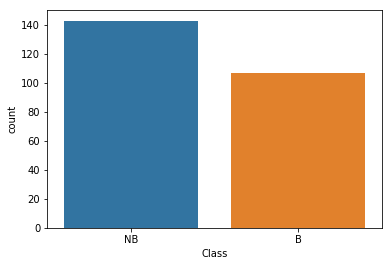

In [205]:
sns.countplot(df_bankruptcy['Class'])

There are two unique class non bankruptcy and bankruptcy

#### As seen no missing values are present

### 2. Encode the attributes

In [6]:
#using onehot encoding for categorical value to numerical value
df_encode=pd.get_dummies(df_bankruptcy.iloc[:,:-1]) #only independent varaibles

In [7]:
df_encode.head()

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [158]:
df_encode.shape

(250, 18)

In [159]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
Industrial Risk_A          250 non-null uint8
Industrial Risk_N          250 non-null uint8
Industrial Risk_P          250 non-null uint8
Management Risk_A          250 non-null uint8
Management Risk_N          250 non-null uint8
Management Risk_P          250 non-null uint8
Financial Flexibility_A    250 non-null uint8
Financial Flexibility_N    250 non-null uint8
Financial Flexibility_P    250 non-null uint8
Credibility_A              250 non-null uint8
Credibility_N              250 non-null uint8
Credibility_P              250 non-null uint8
Competitiveness_A          250 non-null uint8
Competitiveness_N          250 non-null uint8
Competitiveness_P          250 non-null uint8
Operating Risk_A           250 non-null uint8
Operating Risk_N           250 non-null uint8
Operating Risk_P           250 non-null uint8
dtypes: uint8(18)
memory usage: 4.5 KB


### 3. Separate the dependant variable from the rest of the train data

In [160]:
#use label encoder for target
#Y is the target variable
Y=LabelEncoder().fit_transform(np.array(df_bankruptcy['Class']))

In [161]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

### 4. Split the data into train and test

In [162]:
#Store the independent varaible as array
X=np.array(df_encode)

In [163]:
X.shape

(250, 18)

In [164]:
Y.shape

(250,)

In [165]:
#split with 80 and 20 ratio
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=2)

In [166]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train (200, 18)
X_test (50, 18)
Y_train (200,)
Y_test (50,)


### 5. Apply PCA on the independent features of train data. 

 ### Standardize the train data

In [167]:
# We transform (centralize) the entire X (independent variable data) through standard scalar transformation.
#We will create the PCA dimensions on this distribution. 
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)          

C:\Users\PYTHON\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\PYTHON\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [168]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

 ###  6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance).

In [169]:
pca.components_.shape

(18, 18)

In [170]:
var_explained=pca.explained_variance_
print(var_explained)

[4.60067242e+00 2.14947147e+00 1.84755577e+00 1.76418568e+00
 1.48576621e+00 1.39145673e+00 1.38008233e+00 1.05078168e+00
 9.24146881e-01 8.01497160e-01 4.76960258e-01 2.17875672e-01
 5.11119440e-31 2.05292236e-31 9.62559914e-32 3.53402358e-32
 2.80252700e-32 1.89921424e-32]


In [178]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
print(cum_var_exp)

[0.25431495 0.37313295 0.47526173 0.572782   0.65491185 0.73182849
 0.80811637 0.86620125 0.91728603 0.96159101 0.98795632 1.
 1.         1.         1.         1.         1.         1.        ]


In [172]:
# We can see that at 10th PCA component 95% data is covered

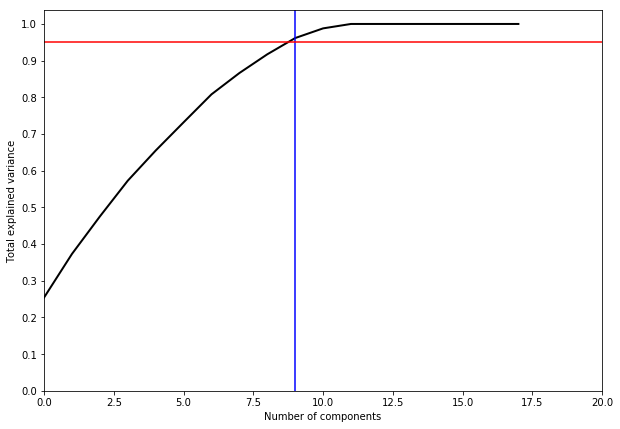

In [174]:
plt.figure(figsize=(10,7))

plt.plot(cum_var_exp, color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0,20)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(9, c='b') 
plt.axhline(0.95, c='r')

plt.show()

### 7. Transform the data using PCA ( select optimum number of PCs).

In [175]:
#n_components=10 rebuild model for PCA with n_componets as 10
pca_transfrom = PCA(n_components=10)

In [212]:
#fit and transform the X_std
PCA_components = pd.DataFrame(pca_transfrom.fit_transform(X_train_std))

In [177]:
PCA_components.shape

(200, 10)

In [179]:
X_train_pca=np.array(PCA_components)

### 8.Apply KMeans algorithm on the above transformed data.

In [180]:
from sklearn.cluster import KMeans

In [181]:
# Check for a range of k from 1 to 10
cluster_range = range( 1,10)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(X_train_pca)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

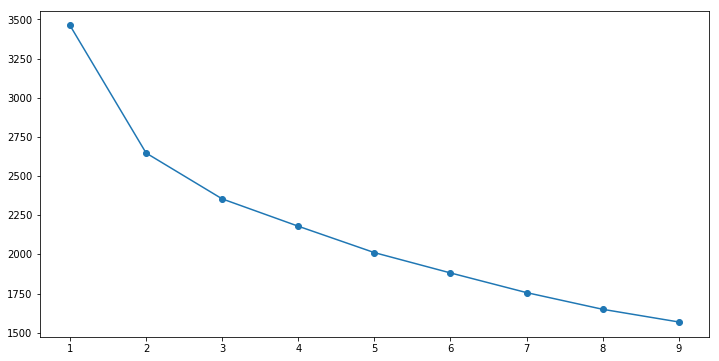

In [182]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.22618816263996844


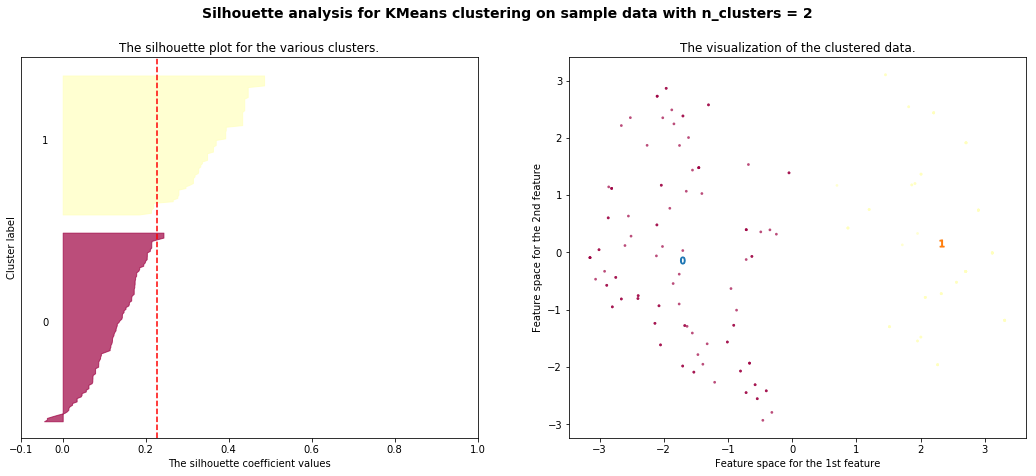

For n_clusters = 3 The average silhouette_score is : 0.22537389376481864


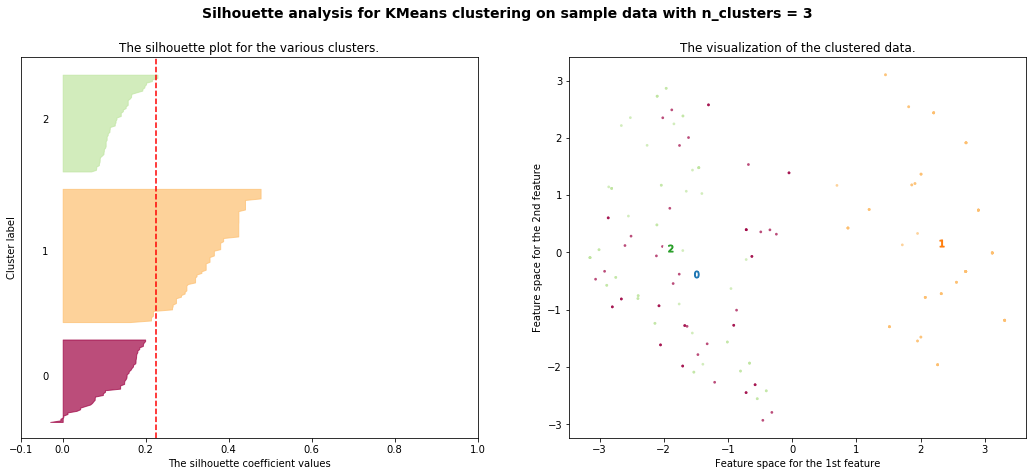

For n_clusters = 4 The average silhouette_score is : 0.22819419475410777


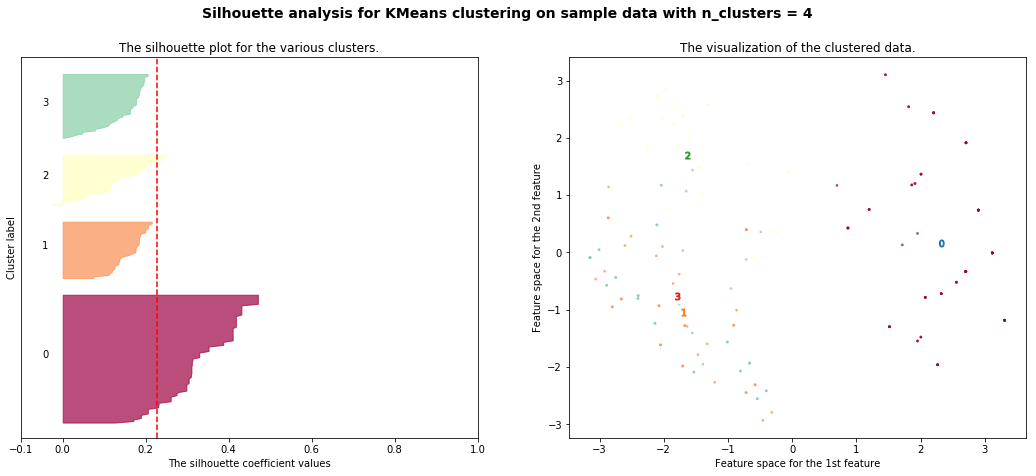

For n_clusters = 5 The average silhouette_score is : 0.1883743427982546


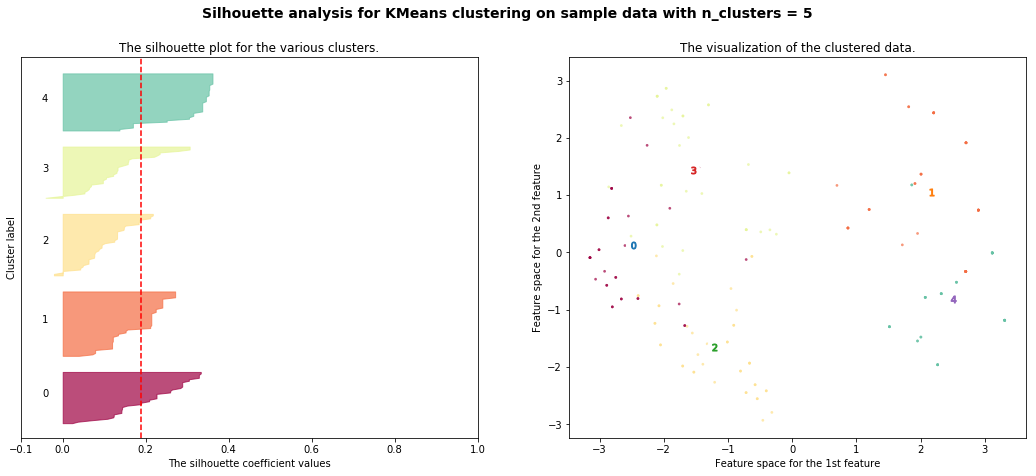

For n_clusters = 6 The average silhouette_score is : 0.19083440064208618


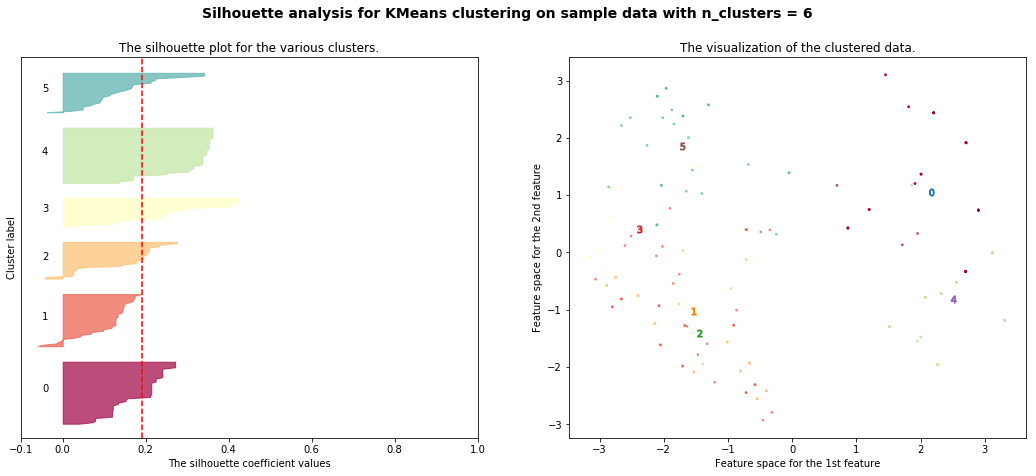

In [183]:
from __future__ import print_function
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
print(__doc__)

X=X_train_pca
Y=Y_train

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

 ### 9. Select optimal number of clusters and form clusters out of the train data.

#### Taking 2 as no of clusters as we know there are two distinct class and also the same is reflecting in the elbow plot

In [184]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)

In [185]:
kmeans.fit(X_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [214]:
#The 2 clusters are  formed with centroids as
centroids=kmeans.cluster_centers_
print(centroids)

[[-1.71387672 -0.12742305  0.00799757  0.20726356  0.02723503 -0.06533462
  -0.03048084  0.08068692 -0.02272356 -0.02199554]
 [ 2.31877439  0.17239589 -0.01082025 -0.28041541 -0.03684739  0.08839389
   0.04123878 -0.10916466  0.03074364  0.02975867]]


In [215]:
# the X_train_pca data is now divided into 2 clusters
kmeans.labels_

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1])

In [217]:
labels=kmeans.predict(X_train_pca)
print(labels)

[0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1
 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0
 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1
 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0
 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1]


##### The cluster are formed as shown below in line[220]

### 10. Create a new column in the train data and populate it with the cluster labels.

In [187]:
centroid_df = pd.DataFrame(centroids, columns = list(X_train_pca) )
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels.shape

(200, 1)

In [188]:
df_labels['labels'] = df_labels['labels'].astype('category')

In [189]:
# Joining the label dataframe with X train pca applied.
X_train_clus = pd.DataFrame(X_train_pca).join(df_labels)
X_train_clus.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,-2.259133,1.869471,-1.559730,-1.063595,2.363942,-0.557740,0.142560,0.326950,-1.826508,1.069904,0
1,2.899599,0.738246,0.215731,-0.406589,-0.335260,-0.698811,0.855743,0.773592,-0.863242,-1.282511,1
2,2.707202,1.914105,-0.889120,0.882001,0.163315,0.786031,0.146812,0.151955,0.414900,-1.437407,1
3,1.198845,0.749432,-0.847118,-0.191520,0.680284,1.257440,-2.383703,1.510507,1.635330,-1.048722,1
4,-0.664169,-1.932660,-1.979057,0.582428,-0.168221,-2.546002,-1.052472,1.353869,-0.076054,0.315279,0


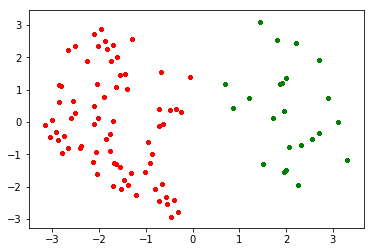

In [220]:
colors = ['r', 'g']
fig, ax = plt.subplots()
c = np.array([3,3])
for i in labels:
        points = np.array(X_train_clus.loc[X_train_clus['labels'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])


### 11. Transform the test data using the same PCA object that was fit on the train data. 

In [190]:
X_test.shape

(50, 18)

In [191]:
#Standardize the test data
X_test_std=sc.transform(X_test) 

C:\Users\PYTHON\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [192]:
#Fit this transformed test data with pca object
X_test_pca=pca_transfrom.transform(X_test_std)

In [193]:
X_test_pca.shape

(50, 10)

### 12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature.

In [194]:
#Apply clustering on this data and predicting the labels for test data
df_test_labels=pd.DataFrame(kmeans.predict(X_test_pca),columns = list(['labels']))

In [195]:
df_test_labels.shape

(50, 1)

In [196]:
df_test_labels['labels'] = df_test_labels['labels'].astype('category')

In [197]:
# Joining the label dataframe with the X_test_pca
X_test_clus = pd.DataFrame(X_test_pca).join(df_labels)
X_test_clus.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,-2.102289,2.726764,-0.079653,2.563781,0.109234,-1.503781,-0.372731,-0.781020,0.244448,-0.119945,0
1,-2.857072,1.143955,0.849226,-0.010071,-0.838624,-0.584207,-2.324292,-1.371170,-1.089817,0.683511,1
2,-1.303400,2.575717,0.039573,0.765816,-1.524531,0.122202,0.462205,-0.886134,-1.806158,0.480802,1
3,2.006797,1.366529,2.322667,-1.359299,0.020573,-0.563493,-1.073968,0.316190,0.235228,1.151019,1
4,-0.456809,-2.930170,1.220382,1.766398,0.889993,0.551125,1.125522,0.555578,-0.901194,0.244968,0


### 13. Apply SVC model on train dataset and predict target for test dataset. 

In [198]:
from sklearn import svm
model_svm = svm.SVC(C=5., gamma=0.001)
#apply svc model on train data
model_svm.fit(X_train_pca, Y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [199]:
model_train_score = model_svm.score(X_train_pca, Y_train)
print(model_train_score)

1.0


In [200]:
#predict the target for test data having the pca applied
y_predict=model_svm.predict(X_test_pca)

In [201]:
y_predict

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1])

In [202]:
Y_test

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1])

As Seen most of the test data are correctly predicted

### 14. Check accuracy and confusion matrix. 

In [203]:
model_svm.score(X_test_pca , Y_test)

0.98

In [204]:
from sklearn import metrics
metrics.confusion_matrix(Y_test,y_predict)

array([[22,  1],
       [ 0, 27]], dtype=int64)